# DSC 530 Final Project
## Week 12
### Ashley Deibler

## Importing Dataset

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtplt
import seaborn as sb
%matplotlib inline

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d kanchana1990/texas-real-estate-trends-2024-500-listings

texas-real-estate-trends-2024-500-listings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
data = pd.read_csv('.kaggle/texas-real-estate-trends-2024-500-listings/real_estate_texas_500_2024.csv')
print(data.head())

                                                 url    status          id  \
0  https://www.realtor.com/realestateandhomes-det...  for_sale  9773941616   
1  https://www.realtor.com/realestateandhomes-det...  for_sale  9224923922   
2  https://www.realtor.com/realestateandhomes-det...  for_sale  9840661824   
3  https://www.realtor.com/realestateandhomes-det...  for_sale  7338317229   
4  https://www.realtor.com/realestateandhomes-det...  for_sale  7285845528   

   listPrice  baths  baths_full  baths_full_calc  beds    sqft  stories  \
0   240000.0      2         2.0              2.0   3.0  1190.0      1.0   
1   379900.0      4         3.0              3.0   4.0  2033.0      1.0   
2   370000.0      2         2.0              2.0   4.0  2062.0      1.0   
3   444000.0      4         3.0              3.0   5.0  3705.0      2.0   
4   569000.0      2         2.0              2.0   3.0  3282.0      2.0   

  sub_type                                               text           type  \


## Data Cleaning and Transformation

In [6]:
display(data.head(10))

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0
5,https://www.realtor.com/realestateandhomes-det...,for_sale,7550452644,875000.0,5,3.0,3.0,4.0,4873.0,2.0,NaN,Exquisite custom home nestled among mature tre...,single_family,1999.0
6,https://www.realtor.com/realestateandhomes-det...,for_sale,9852404810,214500.0,2,2.0,2.0,4.0,2260.0,NaN,NaN,Welcome to your spacious home in the heart of ...,single_family,2020.0
7,https://www.realtor.com/realestateandhomes-det...,for_sale,7370499961,184900.0,3,3.0,3.0,5.0,2109.0,1.0,NaN,"Potential, Potential, Potential! This One Is A...",single_family,1956.0
8,https://www.realtor.com/realestateandhomes-det...,for_sale,8021215105,374900.0,2,2.0,2.0,4.0,1896.0,1.0,NaN,Welcome to country living! Spacious lot sittin...,single_family,2000.0
9,https://www.realtor.com/realestateandhomes-det...,for_sale,9637298240,199900.0,2,2.0,2.0,3.0,1621.0,1.0,NaN,Your family is all that's needed to fill this ...,single_family,2004.0


In [7]:
data.duplicated().sum()

0

In [8]:
# fill missing listing price values with the mean
data['listPrice'] = data['listPrice'].fillna(data['listPrice'].mean())

# drop 'baths_full_calc' to reduce redundancy, and increase legibility. 
data.drop(columns = ['baths_full_calc'], inplace = True)

# drop 'url' due to irrelevance to analysis 
data.drop(columns = ['url'], inplace=True)

# drop 'text' as it is irrelevant to analysis
data.drop(columns = ['text'], inplace=True)

# drop 'sub_type' as it is irrelevant to analysis 
data.drop(columns = ['sub_type'], inplace=True)

In [9]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      501 non-null    object 
 1   id          501 non-null    int64  
 2   listPrice   501 non-null    float64
 3   baths       501 non-null    int64  
 4   baths_full  436 non-null    float64
 5   beds        440 non-null    float64
 6   sqft        438 non-null    float64
 7   stories     391 non-null    float64
 8   type        501 non-null    object 
 9   year_built  289 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 39.3+ KB


# Analysis

## Histograms of Variables

In [10]:
from scipy.stats import iqr

### List Price

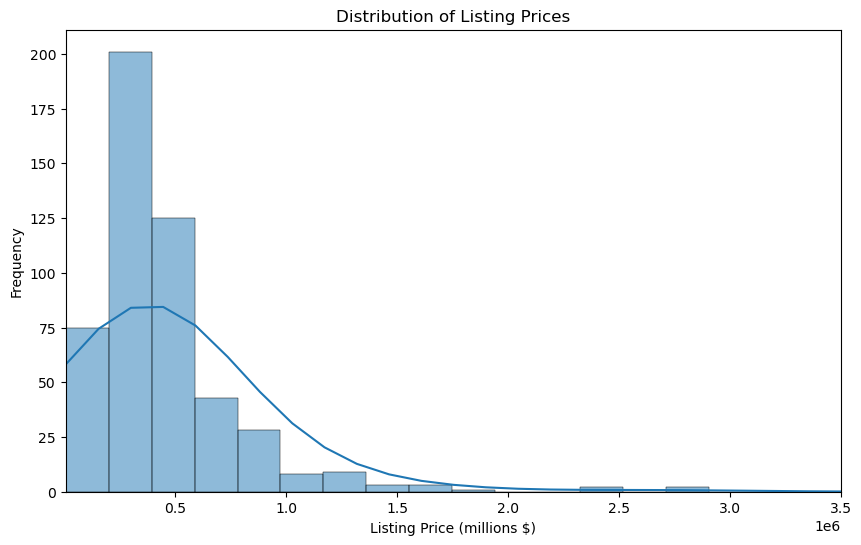

In [11]:
mtplt.figure(figsize = (10,6))
sb.histplot(data['listPrice'], bins = 150, kde = True)
mtplt.title('Distribution of Listing Prices')
mtplt.xlabel('Listing Price (millions $)')
mtplt.ylabel('Frequency')
mtplt.xlim(8000,3500000)
mtplt.show()

In [81]:
listprice = data['listPrice']
lpmean = listprice.mean()
    # $510,668.58
lpmode = listprice.mode()
    # $250,000.00
lpsd = listprice.std()
    # $1,318,409.27

1318409.2650517768

### Square Feet

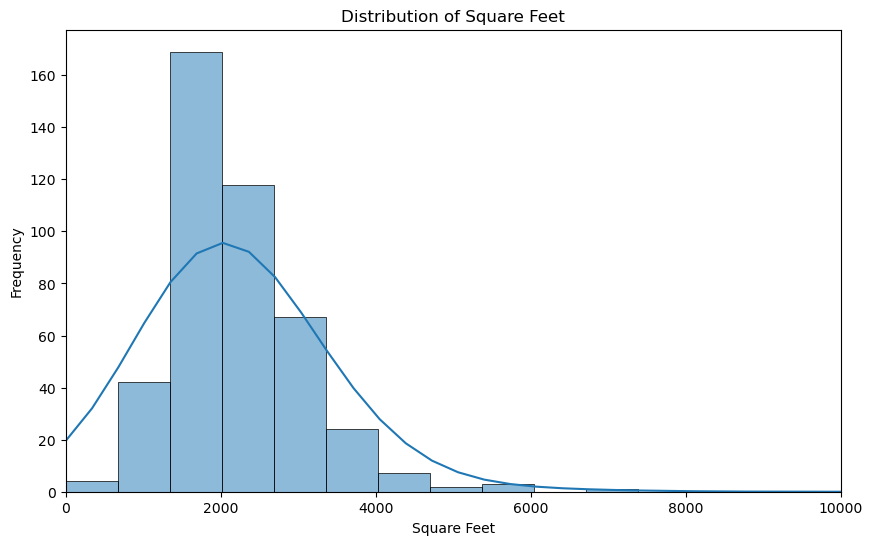

In [13]:
mtplt.figure(figsize = (10,6))
sb.histplot(data['sqft'], bins = 100, kde = True)
mtplt.title('Distribution of Square Feet')
mtplt.xlabel('Square Feet')
mtplt.ylabel('Frequency')
mtplt.xlim(0,10000)
mtplt.show()

In [83]:
sqft = data['sqft']
sqftmean = sqft.mean()
    # 1560 sqft
sqftmode = sqft.mode()
    # 2060 sqft
sqftsd = sqft.std()
    #3220 sqft

3220.2449852955056

### Bedrooms

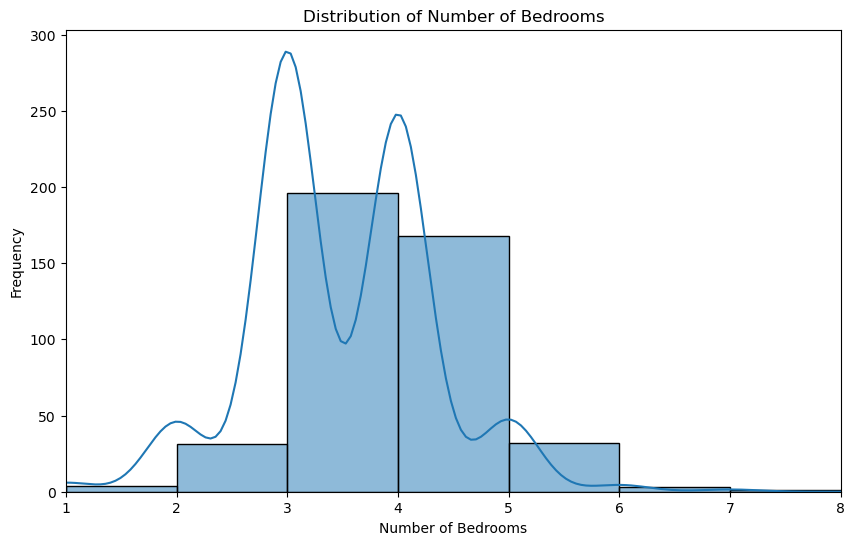

In [15]:
mtplt.figure(figsize = (10,6))
sb.histplot(data['beds'], bins = 9, kde = True)
mtplt.title('Distribution of Number of Bedrooms')
mtplt.xlabel('Number of Bedrooms')
mtplt.ylabel('Frequency')
mtplt.xlim(1,8)
mtplt.show()

In [86]:
beds = data['beds']
bedsmean = beds.mean()
   # 3.5 beds
bedsmode = beds.mode()
    # 3.0 beds
bedssd = beds.std()
    # 0.9 beds

### Year Built

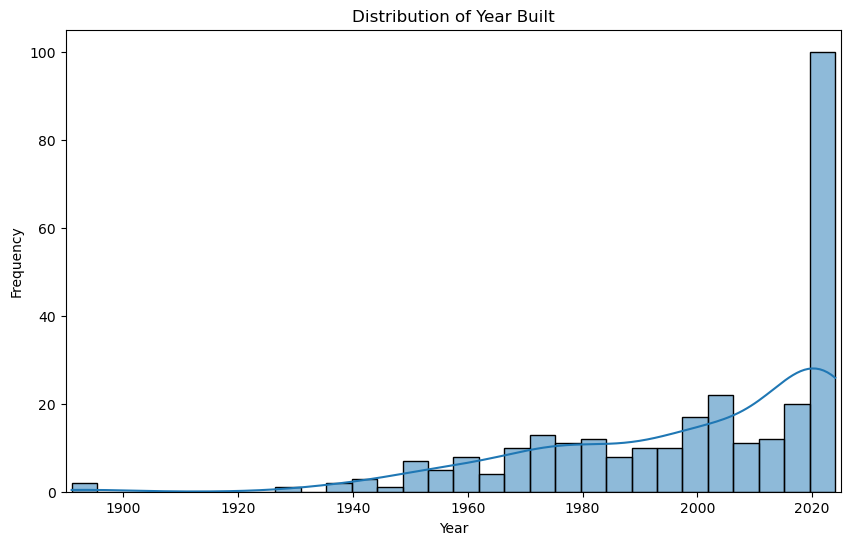

In [17]:
mtplt.figure(figsize = (10, 6))
sb.histplot(data['year_built'], bins = 30, kde = True)
mtplt.title('Distribution of Year Built')
mtplt.xlabel('Year')
mtplt.ylabel('Frequency')
mtplt.xlim(1890, 2025)
mtplt.show()

In [88]:
yearbuilt = data['year_built']
yb_mean = yearbuilt.mean()
    # 1999
yb_mode = yearbuilt.mode()
    # 2024
yb_sd = yearbuilt.std()
    # 25.4 years

25.400942438778966

### Bathrooms

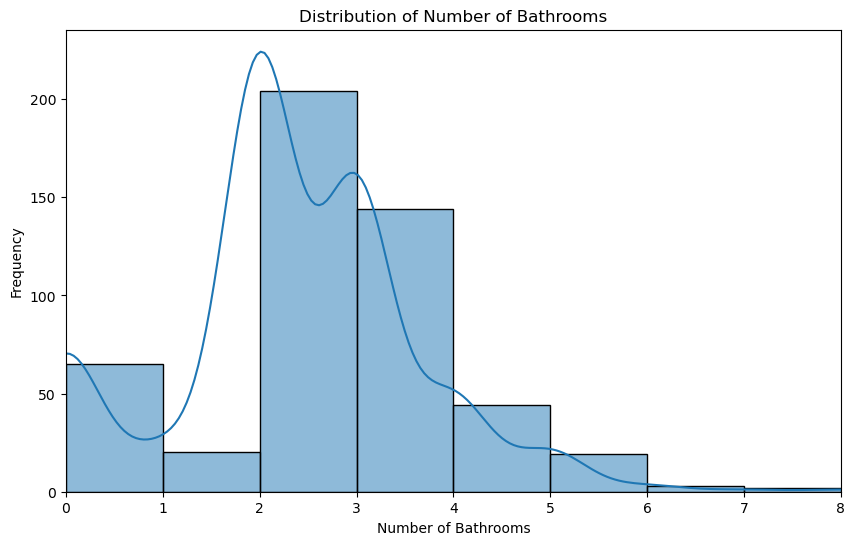

In [19]:
mtplt.figure(figsize=(10,6))
sb.histplot(data['baths'], bins = 8, kde = True)
mtplt.title('Distribution of Number of Bathrooms')
mtplt.xlabel('Number of Bathrooms')
mtplt.ylabel('Frequency')
mtplt.xlim(0, 8)
mtplt.show()

In [91]:
baths = data['baths']
baths_mean = baths.mean()
    # 2.3 bathrooms
baths_mode = baths.mode()
    # 2 bathrooms 
baths_sd = baths.std()
    # 1.3 bathrooms

### Property Types

,Property Type,Count
0,single_family,402
1,land,49
2,farm,26
3,mobile,12
4,townhomes,6
5,condos,5
6,multi_family,1


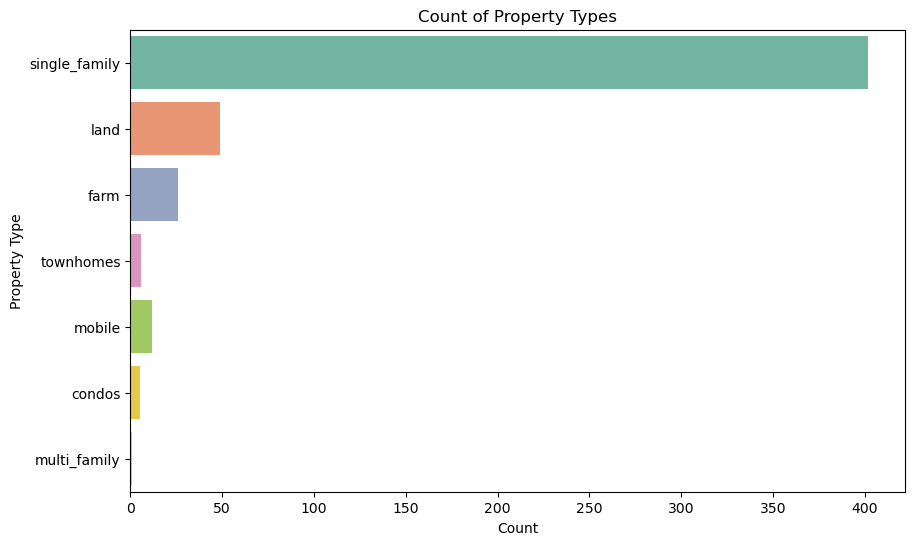

In [21]:
mtplt.figure(figsize = (10,6))
sb.countplot(y = 'type', data = data, palette = 'Set2')
mtplt.title('Count of Property Types')
mtplt.xlabel('Count')
mtplt.ylabel('Property Type')
mtplt.show

type_counts = data['type'].value_counts().reset_index()
type_counts.columns = ['Property Type', 'Count']
type_counts

## PMF

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtplt
from empiricaldist import Cdf, Pmf

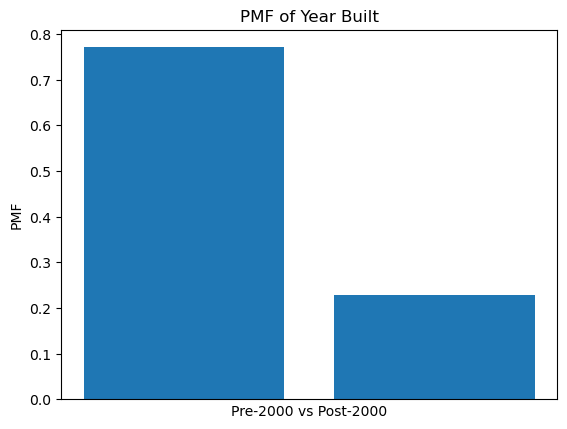

In [65]:
fig, ax = mtplt.subplots()

year = data['year_built']
pre2000 = year < 2000

pmf_year = Pmf.from_seq(pre2000)
pmf_year.bar()

ax.set(title='PMF of Year Built',
      xlabel = 'Pre-2000 vs Post-2000',
      ylabel = 'PMF')

mtplt.xticks([])
mtplt.show()

## CDF

In [66]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

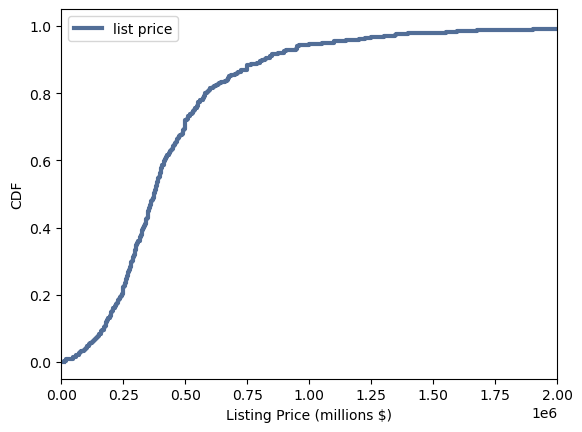

In [67]:
price = data['listPrice']
cdf = ts2.Cdf(price, label = 'list price')
tp.Cdf(cdf)
tp.Config(xlabel = 'Listing Price (millions $)', ylabel = 'CDF', loc = 'upper left', xlim = [0, 2000000])

In [68]:
cdf.Prob(1000000)

0.9461077844311377

In [69]:
cdf.Value(0.5)

374990.0

## Scatter Plots

### Square Feet versus Listing Price

In [70]:
%matplotlib inline
import matplotlib.pyplot as mtplt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

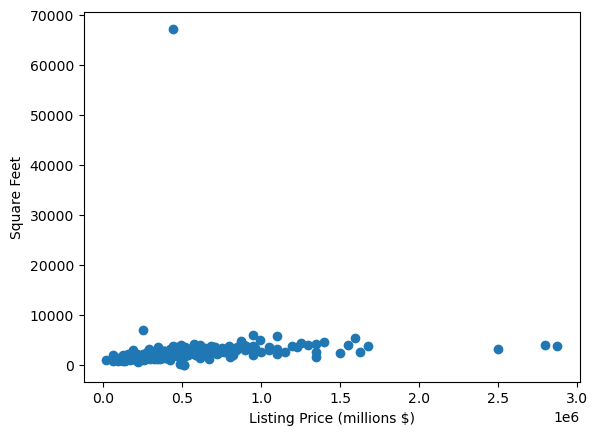

In [76]:
price = data['listPrice']
sqft = data['sqft']

mtplt.scatter(price, sqft)
mtplt.xlabel('Listing Price (millions $)')
mtplt.ylabel('Square Feet')
mtplt.show

### Bedrooms versus Square Footage

<function matplotlib.pyplot.show(close=None, block=None)>

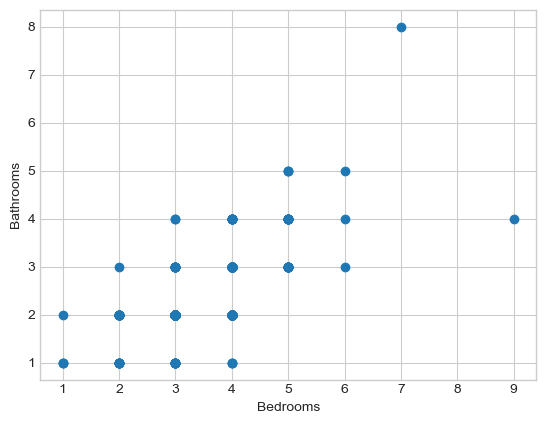

In [497]:
beds = data['beds']
baths = data['baths_full']
mtplt.scatter(beds, baths)
mtplt.xlabel('Bedrooms')
mtplt.ylabel('Bathrooms')
mtplt.show

## Hypothesis Test

H0 = Listing price and square footage are dependent on each other. 

H1 = Listing price and square footage are independent of each other. 

In [527]:
import random
import numpy as np
import thinkstats2 as ts2
import thinkplot as tp

In [533]:
tempdf = data.groupby(['listPrice', 'sqft']).size().reset_index(name = 'Count')
price_sqft_data = tempdf.drop('Count', axis = 1)
price_sqft_data

,listPrice,sqft
0,19000.0,971.0
1,60000.0,792.0
2,65000.0,2020.0
3,72000.0,1235.0
4,89900.0,1276.0
...,...,...
429,1625000.0,2652.0
430,1675000.0,3702.0
431,2500000.0,3090.0
432,2800000.0,4000.0


In [536]:
from scipy.stats import chi2_contingency

obs = price_sqft_data
chi2, p, dof, ex = chi2_contingency(obs, correction = False)

print("Expected Frequencies:", np.round(ex,2))
print("Degrees of Freedom:", dof)
print("Test Stat:%.4f"  % chi2)
print("p value: %.4f" % p)
        

Expected Frequencies: [[1.98707500e+04 1.00250000e+02]
 [6.04868400e+04 3.05160000e+02]
 [6.66835700e+04 3.36430000e+02]
 [7.28673800e+04 3.67620000e+02]
 [9.07183200e+04 4.57680000e+02]
 [9.52395100e+04 4.80490000e+02]
 [1.09798060e+05 5.53940000e+02]
 [1.10414950e+05 5.57050000e+02]
 [1.10466680e+05 5.57320000e+02]
 [1.16018670e+05 5.85330000e+02]
 [1.25082940e+05 6.31060000e+02]
 [1.26338610e+05 6.37390000e+02]
 [1.29403150e+05 6.52850000e+02]
 [1.30630950e+05 6.59050000e+02]
 [1.31466740e+05 6.63260000e+02]
 [1.35122290e+05 6.81710000e+02]
 [1.40227540e+05 7.07460000e+02]
 [1.40272310e+05 7.07690000e+02]
 [1.49823130e+05 7.55870000e+02]
 [1.50799200e+05 7.60800000e+02]
 [1.50925560e+05 7.61440000e+02]
 [1.55471630e+05 7.84370000e+02]
 [1.60394790e+05 8.09210000e+02]
 [1.61377830e+05 8.14170000e+02]
 [1.69989390e+05 8.57610000e+02]
 [1.70149580e+05 8.58420000e+02]
 [1.70153560e+05 8.58440000e+02]
 [1.70384390e+05 8.59610000e+02]
 [1.77166180e+05 8.93820000e+02]
 [1.80116290e+05 9.08

In [537]:
from scipy.stats import chi2

alpha = 0.01
df = (434-1)*(2-1)
critical_stat = chi2.ppf((1-alpha), df)
print("critical stat:%.4f" % critical_stat)

critical stat:504.3856


Because the p-value is smaller than alpha = 0.01 (and calculated statistic = 1833971.99 is larger than the critical statistic = 504.39), we can reject the null hypothesis. At this significance level, it can be concluded that listing price and square footage are independent of each other. 

## Regression Analysis

In [564]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtplt
import statsmodels.api as sm

In [563]:
ps_data = price_sqft_data
x = ps_data['sqft']
y = ps_data['listPrice']

In [574]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()

In [575]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listPrice   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.48
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000768
Time:                        18:30:59   Log-Likelihood:                -6119.6
No. Observations:                 434   AIC:                         1.224e+04
Df Residuals:                     432   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.262e+05   1.91e+04     22.288      0.000    3.89e+05    4.64e+05
sqft          16.2445      4.794      3.388      0.001       6.822      25.667
==============================================================================
Omnibus:                      332.646   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5887.782
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      19.902   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

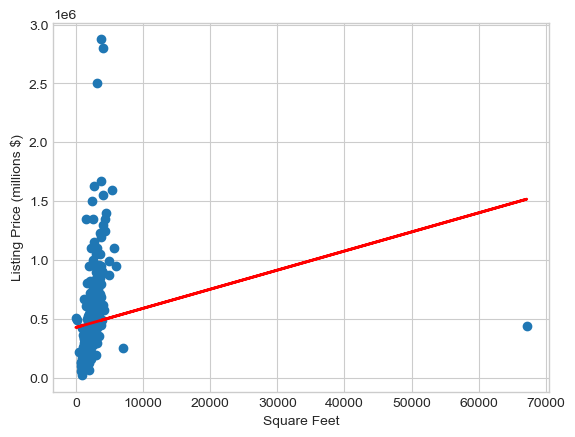

In [577]:
plt.scatter(x,y)
yhat = 16.2445*x + 4.262e+05
fig = plt.plot(x,yhat, lw = 2, color = 'red', label = 'regression line')
plt.xlabel('Square Feet')
plt.ylabel('Listing Price (millions $)')
plt.show()